In [1]:
import matplotlib.pyplot as plt # Para gráficar
import numpy as np # Para cálculos

# Paquete para la clase MOOP
from EMO.MOOP import MOOP

# Estrategia de reducción de objetivos 
# Deb & Saxena
from EMO.MOOP import Obj_NonRed
from EMO.MOOP import PCAs

# Para Brockhoff & Zitzler
from EMO.MOOP import MOSS_Exact # Computa el algoritmo exacto para el problema MOSS
from EMO.MOOP import Sets_Delta # Retorna los distintos subconjuntos de objetivos con sus errores asociados

# Función de Kursawe - Animación

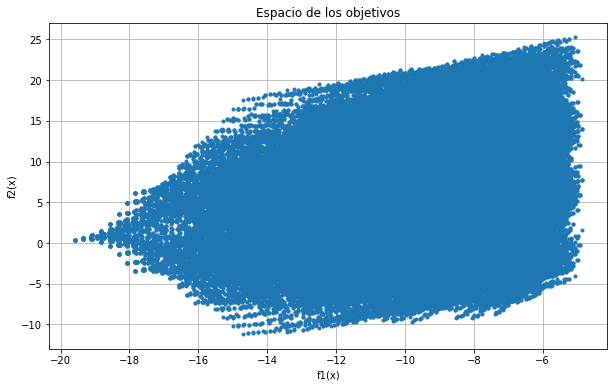

In [4]:
# Se definen las funciones del MOOP que se quiere resolver
def f1(x):
    s = 0
    for i in range(len(x)-1):
        s += -10*np.exp(-0.2*np.sqrt(x[i]**2 + x[i+1]**2))
    return s

def f2(x):
    s = 0
    for i in range(len(x)):
        s += abs(x[i])**0.8 + 5*np.sin(x[i]**3)
    return s


## Aquí generamos el espacio objetivo
n = 70
x, y, z = np.meshgrid(np.linspace(-5,5,n), np.linspace(-5,5,n),np.linspace(-5,5,n), indexing='ij')
x = np.repeat(x, 1)
y = np.repeat(y, 1)
z = np.repeat(z, 1)

# Variables donde se guardan las evaluaciones de la rejilla generada
valores_f1 = [f1([x[i],y[i],z[i]]) for i in range(len(x))]
valores_f2 = [f2([x[i],y[i],z[i]]) for i in range(len(x))]

plt.figure(figsize=(10,6))
plt.xlabel('f1(x)')
plt.ylabel('f2(x)')
plt.title('Espacio de los objetivos')
plt.grid()
plt.plot(valores_f1,valores_f2,'.')
plt.show()

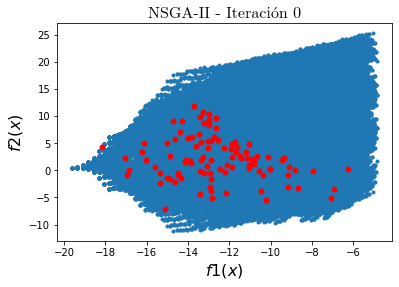

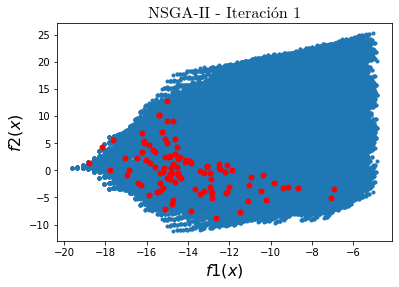

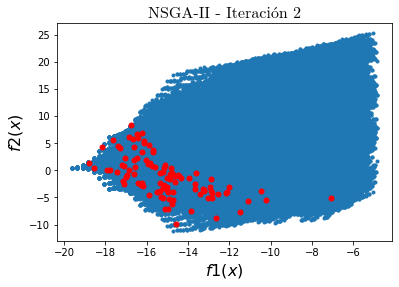

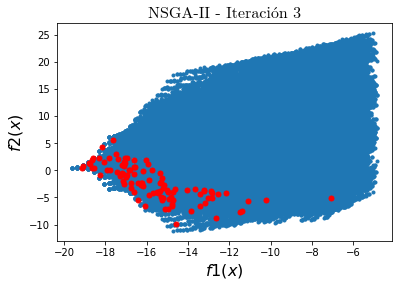

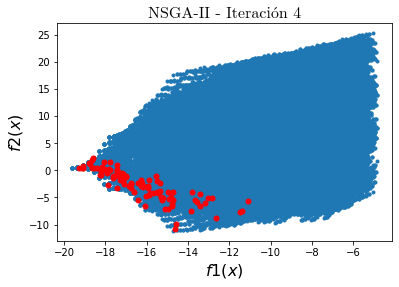

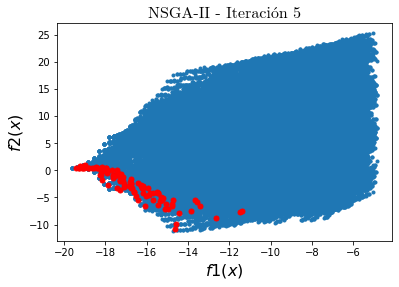

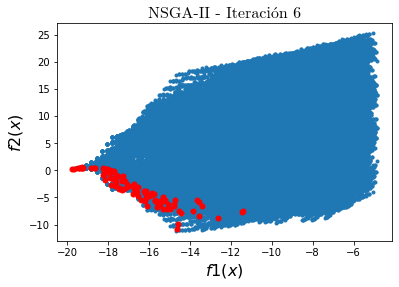

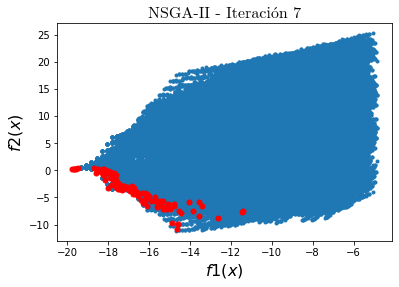

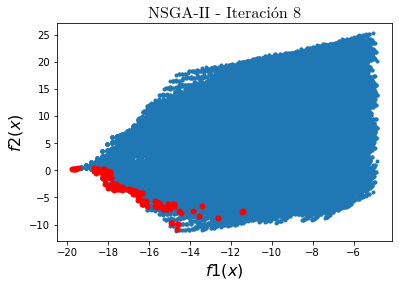

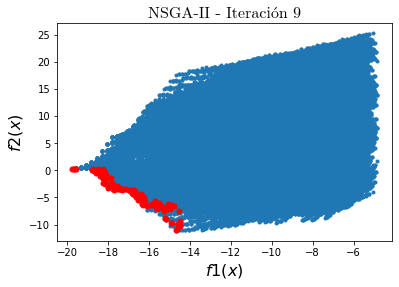

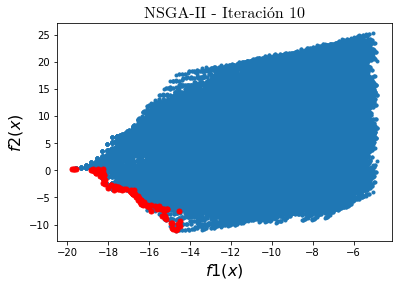

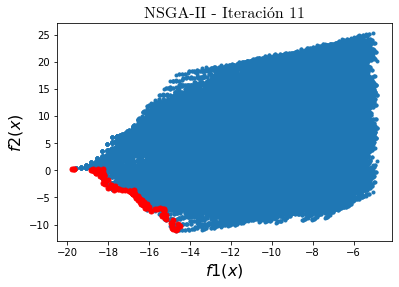

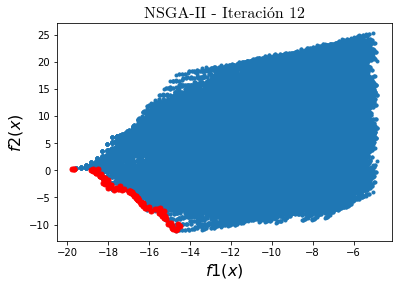

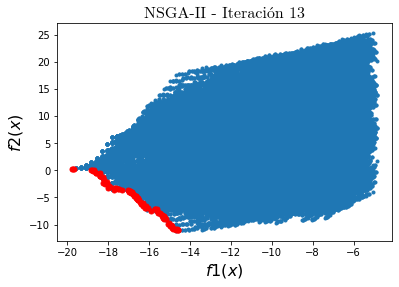

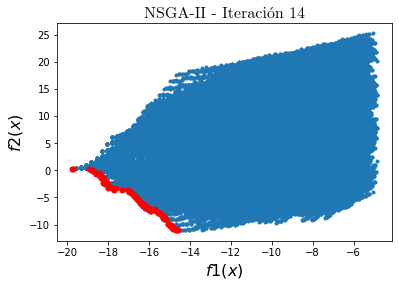

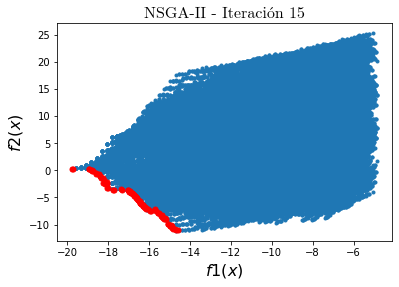

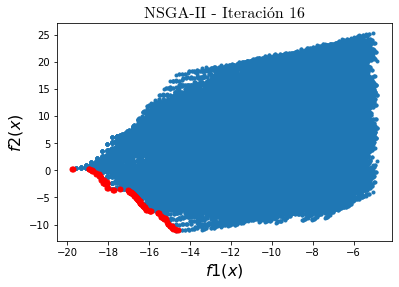

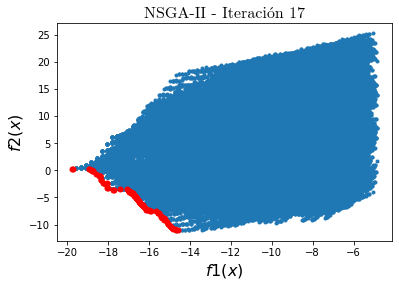

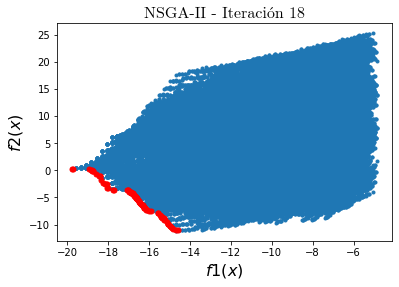

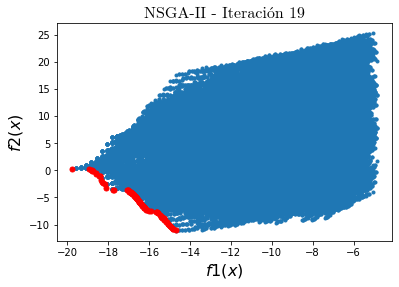

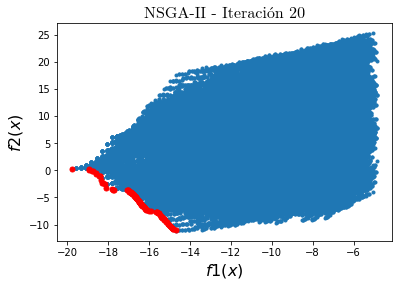

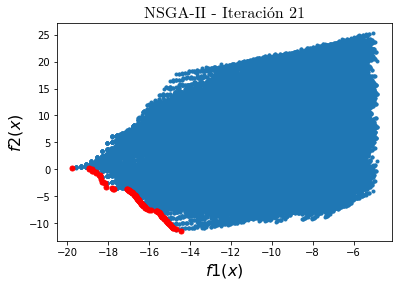

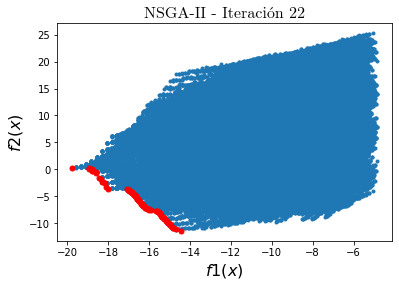

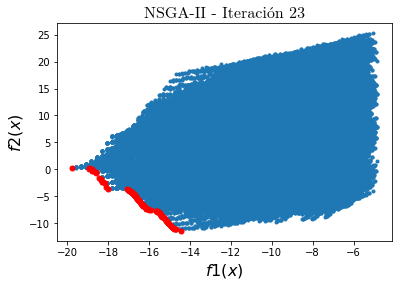

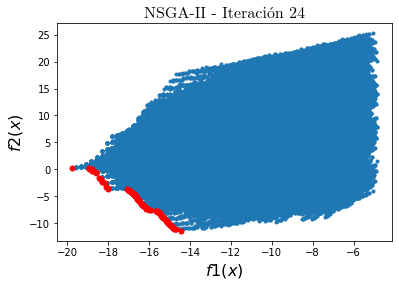

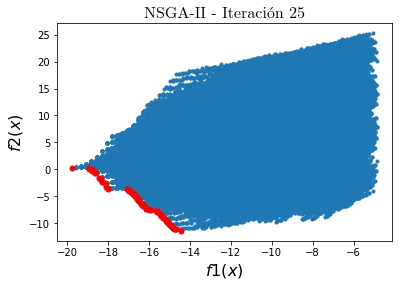

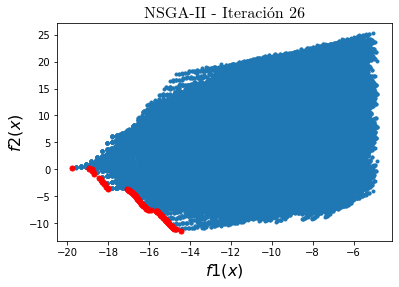

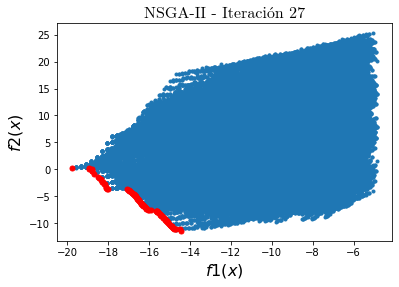

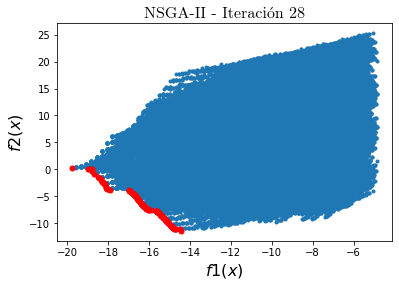

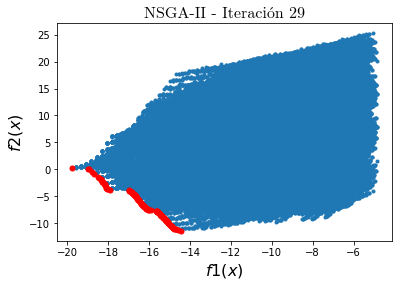

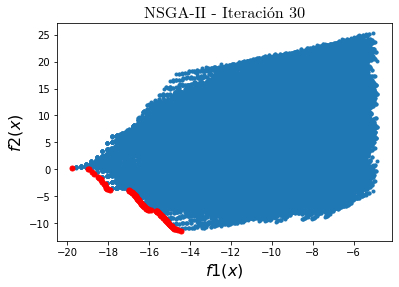

In [5]:
# Llamando a la clase MOOP
problem = MOOP(num_variables = 3, functions = [f1, f2], intervals = (-5, 5))

# Resolviendo el problema con NSGA - II
problem.solveNSGA2(num_generations = 31, 
                   plot_iter = True, # Esto es para graficas todas las generaciones
                   objective_space = [valores_f1, valores_f2]) # Lista donde se guardan las evaluaciones en el espacio objetivo
                   #archive_name = 'Kur') # Esto es para guardar las imágenes generadas en formato jpeg

# Con esto se generó el fotograma para la animación de la presen